https://www.youtube.com/watch?v=1FYrnwqWQNY&t=1094s

https://en.wikipedia.org/wiki/Lotka%E2%80%93Volterra_equations

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define the General Model

def LotkaVolterraModel(x,params):
    
    alpha = params["alpha"]
    beta = params["beta"]
    gamma = params["gamma"]
    delta = params["delta"]
    
    xdot=np.array([alpha*x[0] - beta*x[0]*x[1],delta*x[0]*x[1]-gamma*x[1]])
    
    return xdot


In [3]:
# RK4 Method

def RungeKutta4(f,x0,t0,tf,dt):
    
    t = np.arange(t0,tf,dt)
    nt = t.size
    
    nx = x0.size
    x = np.zeros((nx,nt))
    
    x[:,0] = x0
    
    for k in range(nt-1):
        
#         k1 = dt*np.array([alpha*x[0,k] - beta*x[0,k]*x[1,k],delta*x[0,k]*x[1,k]-gamma*x[1,k]])
        k1 = dt*f(t[k],x[:,k])
        k2 = dt*f(t[k] + dt/2,x[:,k] + k1/2)
        k3 = dt*f(t[k] + dt/2,x[:,k] + k2/2)
        k4 = dt*f(t[k] + dt,x[:,k] + k3)
        
        dx = (k1 + 2*k2 + 2*k3 +k4)/6
        
        x[:,k+1] = x[:,k] + dx
        
    return x,t


In [10]:
# Define Problem

params = {"alpha":1.1,"beta":0.4, "gamma":0.4, "delta":0.1}

f = lambda t,x: LotkaVolterraModel(x,params)

x0 = np.array([20,5])

# Solve the Diff Eq.

t0 = 0
tf = 100
dt = 0.01

x,t = RungeKutta4(f,x0,t0,tf,dt)


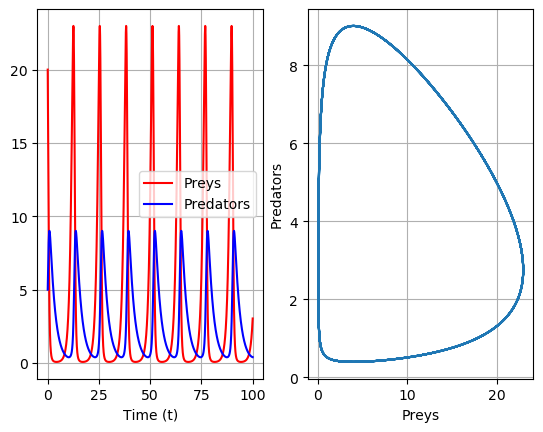

In [11]:
# Plot Results

plt.subplot(1,2,1)
plt.plot(t,x[0,:],"r", label="Preys")
plt.plot(t,x[1,:], "b", label="Predators")
plt.xlabel("Time (t)")
plt.grid()
plt.legend()

plt.subplot(1,2,2)
plt.plot(x[0,:], x[1,:])
plt.xlabel("Preys")
plt.ylabel("Predators")
plt.grid()